# Kapitel 6.3: Gattungen

Das Notebook ergänzt Kapitel 6.3 'Gattungen'.

# Import

In [1]:
import pandas as pd
import numpy as np

from resources_statistics import *
from resources_geschichtslyrik import *

import plotly.express as px
import plotly.graph_objects as go
from plotly.validators.scatter.marker import SymbolValidator

from tqdm.notebook import tqdm

In [2]:
meta = pd.read_json(r"../resources/meta.json")

# Korpora

In [3]:
meta_anth = (
    meta
    .query("corpus=='anth'")
    .query("1850 <= year <= 1918")
    .query("geschichtslyrik == 1")
    .drop_duplicates(subset='author_title')
)

meta_anth_bin = binarize_meta(meta_anth)

In [4]:
modcanon_authors = ['Hofmannsthal, Hugo von', 'Rilke, Rainer Maria', 'George, Stefan', 'Heym, Georg']

meta_modcanon = (
    meta
    .query("author in @modcanon_authors")
    .query("1850 <= year <= 1918")
    .query("geschichtslyrik == 1")
    .drop_duplicates(subset='author_title')
)

In [5]:
muench_authors = ['Münchhausen, Börries von', 'Miegel, Agnes', 'Strauß und Torney, Lulu von']

meta_muench = (
    meta
    .query("author in @muench_authors")
    .query("1850 <= year <= 1918")
    .query("geschichtslyrik == 1")
    .drop_duplicates(subset='author_title')
)

In [6]:
sub_df = pd.DataFrame()
sub_names = ['Anthologien', 'Kanonisierte Moderne', 'Münchhausen-Kreis']
sub_metas = [meta_anth, meta_modcanon, meta_muench]

# Gattungshäufigkeit – Korpora

In [7]:
for this_name, this_meta in zip(sub_names, sub_metas):
    sub_df.loc[this_name, 'Jahr'] = round(this_meta['year'].mean(), 0)
        
    balladen = this_meta.query("gattung.str.contains('Ballade', na = False)").shape[0]
    rollengedichte = this_meta.query("gattung.str.contains('Rollengedicht', na = False)").shape[0]
    denkmalgedichte = this_meta.query("gattung.str.contains('Denkmal', na = False)").shape[0]
    lieder = this_meta.query("gattung.str.contains('Lied', na = False)").shape[0]
    sonette = this_meta.query("gattung.str.contains('Sonett', na = False)").shape[0]
    keine_gattung = this_meta.query("gattung.isna()").shape[0]
    mehrere_gattungen = this_meta.query("gattung.str.contains('+', na = False, regex = False)").shape[0]

    sub_df.loc[this_name, 'Texte'] = this_meta.shape[0]
    sub_df.loc[this_name, 'Balladen'] = balladen
    sub_df.loc[this_name, 'Balladen (Anteil)'] = balladen/this_meta.shape[0]
    sub_df.loc[this_name, 'Rollengedichte'] = rollengedichte
    sub_df.loc[this_name, 'Rollengedichte (Anteil)'] = rollengedichte/this_meta.shape[0]
    sub_df.loc[this_name, 'Denkmal-/Ruinenpoesie'] = denkmalgedichte
    sub_df.loc[this_name, 'Denkmal-/Ruinenpoesie (Anteil)'] = denkmalgedichte/this_meta.shape[0]
    sub_df.loc[this_name, 'Lieder'] = lieder
    sub_df.loc[this_name, 'Lieder (Anteil)'] = lieder/this_meta.shape[0]
    sub_df.loc[this_name, 'Sonette'] = sonette
    sub_df.loc[this_name, 'Sonette (Anteil)'] = sonette/this_meta.shape[0]
    sub_df.loc[this_name, 'Keine Gattung'] = keine_gattung
    sub_df.loc[this_name, 'Keine Gattung (Anteil)'] = keine_gattung/this_meta.shape[0]
    sub_df.loc[this_name, 'Mehrere Gattungen'] = mehrere_gattungen
    sub_df.loc[this_name, 'Mehrere Gattungen (Anteil)'] = mehrere_gattungen/this_meta.shape[0]

    handlung = this_meta.query("inhaltstyp.str.contains('Ereignis')").shape[0]
    zustand = this_meta.query("inhaltstyp.str.contains('Zustand')").shape[0]
    
    sub_df.loc[this_name, 'Ereignis'] = handlung
    sub_df.loc[this_name, 'Ereignis (Anteil)'] = handlung/this_meta.shape[0]
    sub_df.loc[this_name, 'Zustand'] = zustand
    sub_df.loc[this_name, 'Zustand (Anteil)'] = zustand/this_meta.shape[0]

    erzaehlen = this_meta.query("sprechakte.str.contains('Erzählen')").shape[0]
    beschreiben = this_meta.query("sprechakte.str.contains('Beschreiben')").shape[0]
    behaupten = this_meta.query("sprechakte.str.contains('Behaupten')").shape[0]
    auffordern = this_meta.query("sprechakte.str.contains('Auffordern')").shape[0]
    fragen = this_meta.query("sprechakte.str.contains('Fragen')").shape[0]
    
    sub_df.loc[this_name, 'Erzählen'] = erzaehlen
    sub_df.loc[this_name, 'Erzählen (Anteil)'] = erzaehlen/this_meta.shape[0]
    sub_df.loc[this_name, 'Beschreiben'] = beschreiben
    sub_df.loc[this_name, 'Beschreiben (Anteil)'] = beschreiben/this_meta.shape[0]
    sub_df.loc[this_name, 'Behaupten'] = behaupten
    sub_df.loc[this_name, 'Behaupten (Anteil)'] = behaupten/this_meta.shape[0]
    sub_df.loc[this_name, 'Auffordern'] = auffordern
    sub_df.loc[this_name, 'Auffordern (Anteil)'] = auffordern/this_meta.shape[0]
    sub_df.loc[this_name, 'Fragen'] = fragen
    sub_df.loc[this_name, 'Fragen (Anteil)'] = fragen/this_meta.shape[0]

In [8]:
round(sub_df, 2)

,Jahr,Texte,Balladen,Balladen (Anteil),Rollengedichte,Rollengedichte (Anteil),Denkmal-/Ruinenpoesie,Denkmal-/Ruinenpoesie (Anteil),Lieder,Lieder (Anteil),...,Erzählen,Erzählen (Anteil),Beschreiben,Beschreiben (Anteil),Behaupten,Behaupten (Anteil),Auffordern,Auffordern (Anteil),Fragen,Fragen (Anteil)
Anthologien,1875.0,1850.0,1036.0,0.56,237.0,0.13,73.0,0.04,142.0,0.08,...,1420.0,0.77,526.0,0.28,345.0,0.19,141.0,0.08,35.0,0.02
Kanonisierte Moderne,1903.0,113.0,10.0,0.09,18.0,0.16,3.0,0.03,0.0,0.00,...,57.0,0.50,72.0,0.64,30.0,0.27,4.0,0.04,9.0,0.08
Münchhausen-Kreis,1905.0,140.0,76.0,0.54,33.0,0.24,1.0,0.01,7.0,0.05,...,108.0,0.77,53.0,0.38,25.0,0.18,5.0,0.04,4.0,0.03


# Gattungshäufigkeit – Zeitverlauf

In [9]:
ts = pd.DataFrame()
ts.index = pd.Series(range(1850, 1919), name = 'year')

In [10]:
ts['text_count'] = meta_anth.groupby('year').size()
ts['text_count'] = ts['text_count'].fillna(0)
ts['text_sum'] = smooth(ts['text_count'], mode = 'sum')

ts['text_nomuench_count'] = [meta_anth.query("year == @x and author not in @muench_authors").shape[0] for x in ts.index]
ts['text_nomuench_sum'] = smooth(ts['text_nomuench_count'], mode = 'sum')

In [11]:
ts['ballade_count'] = [meta_anth.query("year == @x and gattung.str.contains('Ballade')").shape[0] for x in ts.index]
ts['ballade_sum'] = smooth(ts['ballade_count'], mode = 'sum')
ts['ballade_share_smoothed'] = ts['ballade_sum']/ts['text_sum']
ts['ballade_share_smoothed_low'] = [proportion_confint(x, y, 0.1)[0] for x, y in zip(ts['ballade_sum'], ts['text_sum'])]
ts['ballade_share_smoothed_high'] = [proportion_confint(x, y, 0.1)[1] for x, y in zip(ts['ballade_sum'], ts['text_sum'])]

ts['ballade_nomuench_count'] = [meta_anth.query("year == @x and gattung.str.contains('Ballade') and author not in @muench_authors").shape[0] for x in ts.index]
ts['ballade_nomuench_sum'] = smooth(ts['ballade_nomuench_count'], mode = 'sum')
ts['ballade_nomuench_share_smoothed'] = ts['ballade_nomuench_sum']/ts['text_nomuench_sum']
ts['ballade_nomuench_share_smoothed_low'] = [proportion_confint(x, y, 0.1)[0] for x, y in zip(ts['ballade_nomuench_sum'], ts['text_nomuench_sum'])]
ts['ballade_nomuench_share_smoothed_high'] = [proportion_confint(x, y, 0.1)[1] for x, y in zip(ts['ballade_nomuench_sum'], ts['text_nomuench_sum'])]

ts['rollengedicht_count'] = [meta_anth.query("year == @x and gattung.str.contains('Rollengedicht')").shape[0] for x in ts.index]
ts['rollengedicht_sum'] = smooth(ts['rollengedicht_count'], mode = 'sum')
ts['rollengedicht_share_smoothed'] = ts['rollengedicht_sum']/ts['text_sum']
ts['rollengedicht_share_smoothed_low'] = [proportion_confint(x, y, 0.1)[0] for x, y in zip(ts['rollengedicht_sum'], ts['text_sum'])]
ts['rollengedicht_share_smoothed_high'] = [proportion_confint(x, y, 0.1)[1] for x, y in zip(ts['rollengedicht_sum'], ts['text_sum'])]

ts['lied_count'] = [meta_anth.query("year == @x and gattung.str.contains('Lied')").shape[0] for x in ts.index]
ts['lied_sum'] = smooth(ts['lied_count'], mode = 'sum')
ts['lied_share_smoothed'] = ts['lied_sum']/ts['text_sum']
ts['lied_share_smoothed_low'] = [proportion_confint(x, y, 0.1)[0] for x, y in zip(ts['lied_sum'], ts['text_sum'])]
ts['lied_share_smoothed_high'] = [proportion_confint(x, y, 0.1)[1] for x, y in zip(ts['lied_sum'], ts['text_sum'])]

ts['sonett_count'] = [meta_anth.query("year == @x and gattung.str.contains('Sonett')").shape[0] for x in ts.index]
ts['sonett_sum'] = smooth(ts['sonett_count'], mode = 'sum')
ts['sonett_share_smoothed'] = ts['sonett_sum']/ts['text_sum']

ts['denkmal_count'] = [meta_anth.query("year == @x and gattung.str.contains('Denkmal')").shape[0] for x in ts.index]
ts['denkmal_sum'] = smooth(ts['denkmal_count'], mode = 'sum')
ts['denkmal_share_smoothed'] = ts['denkmal_sum']/ts['text_sum']

ts['nogattung_count'] = [meta_anth.query("year == @x and gattung.isna()").shape[0] for x in ts.index]
ts['nogattung_sum'] = smooth(ts['nogattung_count'], mode = 'sum')
ts['nogattung_share_smoothed'] = ts['nogattung_sum']/ts['text_sum']
ts['nogattung_share_smoothed_low'] = [proportion_confint(x, y, 0.1)[0] for x, y in zip(ts['nogattung_sum'], ts['text_sum'])]
ts['nogattung_share_smoothed_high'] = [proportion_confint(x, y, 0.1)[1] for x, y in zip(ts['nogattung_sum'], ts['text_sum'])]

ts['ereignis_count'] = [meta_anth.query("year == @x and inhaltstyp.str.contains('Ereignis')").shape[0] for x in ts.index]
ts['ereignis_sum'] = smooth(ts['ereignis_count'], mode = 'sum')
ts['ereignis_share_smoothed'] = ts['ereignis_sum']/ts['text_sum']
ts['ereignis_share_smoothed_low'] = [proportion_confint(x, y, 0.1)[0] for x, y in zip(ts['ereignis_sum'], ts['text_sum'])]
ts['ereignis_share_smoothed_high'] = [proportion_confint(x, y, 0.1)[1] for x, y in zip(ts['ereignis_sum'], ts['text_sum'])]

ts['zustand_count'] = [meta_anth.query("year == @x and inhaltstyp.str.contains('Zustand')").shape[0] for x in ts.index]
ts['zustand_sum'] = smooth(ts['zustand_count'], mode = 'sum')
ts['zustand_share_smoothed'] = ts['zustand_sum']/ts['text_sum']
ts['zustand_share_smoothed_low'] = [proportion_confint(x, y, 0.1)[0] for x, y in zip(ts['zustand_sum'], ts['text_sum'])]
ts['zustand_share_smoothed_high'] = [proportion_confint(x, y, 0.1)[1] for x, y in zip(ts['zustand_sum'], ts['text_sum'])]

ts['erzaehlen_count'] = [meta_anth.query("year == @x and sprechakte.str.contains('Erzählen')").shape[0] for x in ts.index]
ts['erzaehlen_sum'] = smooth(ts['erzaehlen_count'], mode = 'sum')
ts['erzaehlen_share_smoothed'] = ts['erzaehlen_sum']/ts['text_sum']
ts['erzaehlen_share_smoothed_low'] = [proportion_confint(x, y, 0.1)[0] for x, y in zip(ts['erzaehlen_sum'], ts['text_sum'])]
ts['erzaehlen_share_smoothed_high'] = [proportion_confint(x, y, 0.1)[1] for x, y in zip(ts['erzaehlen_sum'], ts['text_sum'])]

ts['beschreiben_count'] = [meta_anth.query("year == @x and sprechakte.str.contains('Beschreiben')").shape[0] for x in ts.index]
ts['beschreiben_sum'] = smooth(ts['beschreiben_count'], mode = 'sum')
ts['beschreiben_share_smoothed'] = ts['beschreiben_sum']/ts['text_sum']
ts['beschreiben_share_smoothed_low'] = [proportion_confint(x, y, 0.1)[0] for x, y in zip(ts['beschreiben_sum'], ts['text_sum'])]
ts['beschreiben_share_smoothed_high'] = [proportion_confint(x, y, 0.1)[1] for x, y in zip(ts['beschreiben_sum'], ts['text_sum'])]

ts['behaupten_count'] = [meta_anth.query("year == @x and sprechakte.str.contains('Behaupten')").shape[0] for x in ts.index]
ts['behaupten_sum'] = smooth(ts['behaupten_count'], mode = 'sum')
ts['behaupten_share_smoothed'] = ts['behaupten_sum']/ts['text_sum']
ts['behaupten_share_smoothed_low'] = [proportion_confint(x, y, 0.1)[0] for x, y in zip(ts['behaupten_sum'], ts['text_sum'])]
ts['behaupten_share_smoothed_high'] = [proportion_confint(x, y, 0.1)[1] for x, y in zip(ts['behaupten_sum'], ts['text_sum'])]

ts['auffordern_count'] = [meta_anth.query("year == @x and sprechakte.str.contains('Auffordern')").shape[0] for x in ts.index]
ts['auffordern_sum'] = smooth(ts['auffordern_count'], mode = 'sum')
ts['auffordern_share_smoothed'] = ts['auffordern_sum']/ts['text_sum']
ts['auffordern_share_smoothed_low'] = [proportion_confint(x, y, 0.1)[0] for x, y in zip(ts['auffordern_sum'], ts['text_sum'])]
ts['auffordern_share_smoothed_high'] = [proportion_confint(x, y, 0.1)[1] for x, y in zip(ts['auffordern_sum'], ts['text_sum'])]

ts['fragen_count'] = [meta_anth.query("year == @x and sprechakte.str.contains('Fragen')").shape[0] for x in ts.index]
ts['fragen_sum'] = smooth(ts['fragen_count'], mode = 'sum')
ts['fragen_share_smoothed'] = ts['fragen_sum']/ts['text_sum']
ts['fragen_share_smoothed_low'] = [proportion_confint(x, y, 0.1)[0] for x, y in zip(ts['fragen_sum'], ts['text_sum'])]
ts['fragen_share_smoothed_high'] = [proportion_confint(x, y, 0.1)[1] for x, y in zip(ts['fragen_sum'], ts['text_sum'])]

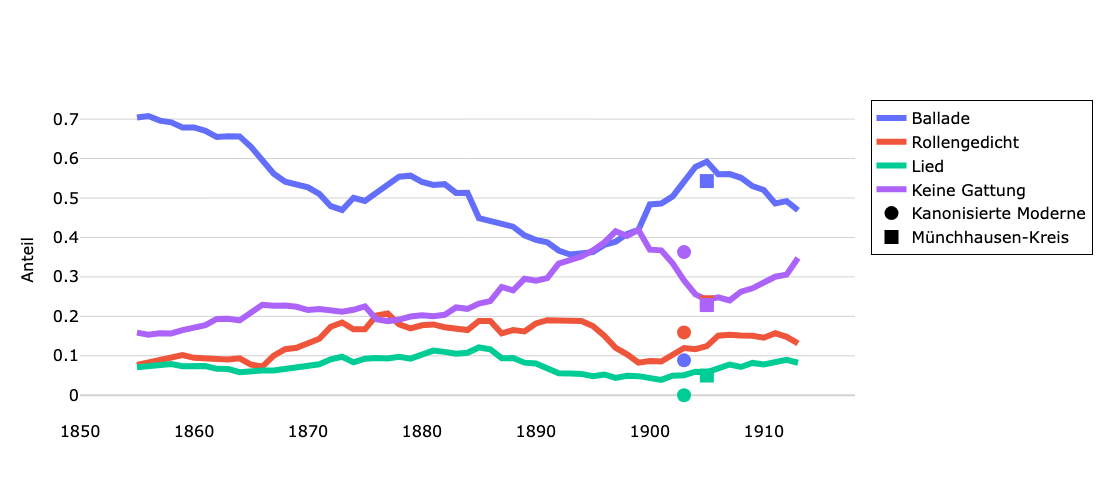

In [46]:
meta_plot = ts[[
    'ballade_share_smoothed', 'rollengedicht_share_smoothed', 
    'lied_share_smoothed', 'nogattung_share_smoothed'
]]
meta_plot.columns = [
    'Ballade', 'Rollengedicht', 
    'Lied', 'Keine Gattung'
]
confint_columns = [
    ['ballade_share_smoothed_low', 'ballade_share_smoothed_high'],
    ['rollengedicht_share_smoothed_low', 'rollengedicht_share_smoothed_high'],
    ['lied_share_smoothed_low', 'lied_share_smoothed_high'],
    ['nogattung_share_smoothed_low', 'nogattung_share_smoothed_high'],
]
save_ts_data(meta_plot, prefix='06_03_Gattungen_')

fig = create_ts_plot(
    data = meta_plot, 
    columns = meta_plot.columns, 
    y_axis_title = 'Anteil',
    add_corporas = sub_df, add_corpora_names = sub_names,
    add_corpora_categories = ['Balladen (Anteil)', 'Rollengedichte (Anteil)', 'Lieder (Anteil)', 'Keine Gattung (Anteil)'],
)
fig = update_fig_for_publication(fig)
fig.write_image(f"plots/6.3.1 Gattungsüberblick.pdf")
fig.show()

# Balladenhäufigkeit ohne Münchhausen

In [13]:
meta_plot = ts[['ballade_share_smoothed', 'ballade_nomuench_share_smoothed']]
meta_plot.columns = ['Ballade', 'Ballade (ohne Münchhausen)']

fig = create_ts_plot(
    data = meta_plot, 
    columns = meta_plot.columns, 
    y_axis_title = 'Anteil'
)
fig.show()

# Balladenanteil häufigster Autor:innen um 1900 im Anthologiekorpus

In [14]:
meta_anth_1895 = meta_anth.query("1895 <= year <= 1905")
meta_anth_1895_balladen = meta_anth_1895.query("gattung.str.contains('Ballade', na = False)")

In [15]:
print(f"Texte 1895–1905          : {meta_anth_1895.shape[0]}")
print(f"Balladen 1895–1905       : {meta_anth_1895_balladen.shape[0]}")
print(f"Balladenanteil 1895–1905 : {meta_anth_1895_balladen.shape[0]/meta_anth_1895.shape[0]}")

Texte 1895–1905          : 127
Balladen 1895–1905       : 61
Balladenanteil 1895–1905 : 0.48031496062992124


In [16]:
top_authors = meta_anth_1895['author'].value_counts()
top_authors_list = top_authors[top_authors >= 5].index.tolist()

for author in top_authors_list:
    meta_author = meta_anth_1895.query("author == @author")
    meta_author_balladen = meta_author.query("gattung.str.contains('Ballade', na = False)")
    print(author)
    print(f"Texte          : {meta_author.shape[0]}")
    print(f"Balladen       : {meta_author_balladen.shape[0]}")
    print(f"Balladenanteil : {meta_author_balladen.shape[0]/meta_author.shape[0]}")
    print("\n")

Schrutz, Demetrius
Texte          : 9
Balladen       : 9
Balladenanteil : 1.0


Miegel, Agnes
Texte          : 7
Balladen       : 6
Balladenanteil : 0.8571428571428571


Münchhausen, Börries von
Texte          : 7
Balladen       : 3
Balladenanteil : 0.42857142857142855


Gaudy, Alice von
Texte          : 6
Balladen       : 5
Balladenanteil : 0.8333333333333334


Greif, Martin
Texte          : 5
Balladen       : 0
Balladenanteil : 0.0


Kunad, Paul
Texte          : 5
Balladen       : 1
Balladenanteil : 0.2




# Ballade – Charakteristische Merkmale

In [17]:
main_feature = 'ballade'

In [18]:
meta_anth_bin.corr(numeric_only=True)[main_feature].sort_values(ascending = False).head(20)

ballade                           1.000000
sprechakt_erzaehlen_vorhanden     0.615652
ereignis                          0.577300
in_hohem_mass_konkret             0.430865
konkretheit                       0.422765
wissen_ergaenzend                 0.387342
words                             0.364751
entity_count                      0.341118
bekanntes_individuum_count        0.302330
unbekanntes_individuum_positiv    0.285839
nation_volk_d_negativ             0.264690
kleinraum_count                   0.254498
fixierbarkeit                     0.249569
entity_negativ                    0.198330
entity_positiv                    0.194662
liebe_negativ                     0.188982
persmarker_vorhanden              0.184839
mittelalter                       0.167912
kollektiv_negativ                 0.163956
unbekanntes_individuum_count      0.148764
Name: ballade, dtype: float64

In [19]:
meta_anth_bin.corr(numeric_only=True)[main_feature].sort_values(ascending = True).head(20)

zustand                                -0.618967
nogenre                                -0.613281
sprechakt_beschreiben_vorhanden        -0.513126
sprechinstanz_markiert                 -0.456834
sprechakte_count                       -0.450952
sprechakt_behaupten_vorhanden          -0.425517
rollengedicht                          -0.406373
wissen_identisch                       -0.382442
sprechinstanz_in_vergangenheit         -0.358080
gegenwartsdominant                     -0.333175
gegenwartsbezug                        -0.312448
sprechakt_auffordern_vorhanden         -0.283006
denkmal                                -0.223064
nationalismus                          -0.214500
sprechinstanz_nicht_in_vergangenheit   -0.212310
lied                                   -0.206659
nichtmensch_count                      -0.199440
ueberlieferung                         -0.188982
decade                                 -0.184349
year                                   -0.171483
Name: ballade, dtype

In [20]:
threshold = 0.2

bin_comp_features = get_features(meta_anth_bin.corr(numeric_only=True)[main_feature], threshold = threshold, mode = 'bin')
bin_comp_features = bin_comp_features + ['heroismus']

cont_comp_features = get_features(meta_anth_bin.corr(numeric_only=True)[main_feature], threshold = threshold, mode = 'cont')

In [21]:
results = relations_binbin(
    meta = meta_anth_bin, 
    main_feature = main_feature,
    comp_features = bin_comp_features
)

In [22]:
directly_related = [
    'nogenre', 'denkmal', 'lied', 'rollengedicht',
    'wissen_ergaenzend', # related to 'wissen_identisch' 
    'sprechinstanz_nicht_in_vergangenheit', 'sprechinstanz_in_vergangenheit' # related to 'gegenwartsbezug'
]
results_filtered = (
    results
    .query("index not in @directly_related")
    .query("chi2_p < 0.05 and min_expected >= 5 and phi >= @threshold")
    .sort_values(by = 'diff', ascending = False)
)
round(results_filtered, 2)

,wenn_nicht,wenn_nicht_detail,wenn_ja,wenn_ja_detail,diff_low_bootstrap,diff_low,diff,diff_high,diff_high_bootstrap,chi2,chi2_p,fisher_p,phi,min_real,min_expected
sprechakt_erzaehlen_vorhanden,0.47,386/814,1.00,1034/1036,0.49,0.49,0.52,0.56,0.56,701.20,0.0,0.0,0.62,2.0,189.20
ereignis,0.50,409/814,0.99,1024/1036,0.45,0.45,0.49,0.52,0.52,616.56,0.0,0.0,0.58,12.0,183.48
in_hohem_mass_konkret,0.63,513/814,0.97,1000/1036,0.30,0.30,0.34,0.37,0.37,343.44,0.0,0.0,0.43,36.0,148.28
fixierbarkeit,0.50,410/814,0.75,772/1036,0.20,0.20,0.24,0.28,0.28,115.23,0.0,0.0,0.25,264.0,293.92
unbekanntes_individuum_positiv,0.18,32/181,0.41,185/450,0.16,0.16,0.23,0.31,0.30,31.41,0.0,0.0,0.22,32.0,62.25
nationalismus,0.22,179/814,0.07,74/1036,-0.18,-0.18,-0.15,-0.12,-0.12,85.12,0.0,0.0,0.21,74.0,111.32
sprechakt_auffordern_vorhanden,0.16,131/814,0.01,10/1036,-0.18,-0.18,-0.15,-0.13,-0.13,148.17,0.0,0.0,0.28,10.0,62.04
gegenwartsdominant,0.28,225/814,0.04,42/1036,-0.27,-0.27,-0.24,-0.20,-0.21,205.36,0.0,0.0,0.33,42.0,117.48
wissen_identisch,0.29,239/814,0.02,25/1036,-0.30,-0.30,-0.27,-0.24,-0.24,270.58,0.0,0.0,0.38,25.0,116.16
gegenwartsbezug,0.45,366/814,0.16,170/1036,-0.33,-0.33,-0.29,-0.24,-0.25,180.60,0.0,0.0,0.31,170.0,235.84


In [23]:
results_other = results.query("index not in @results_filtered.index")
round(results_other.sort_values(by='diff', ascending=False), 2)

,wenn_nicht,wenn_nicht_detail,wenn_ja,wenn_ja_detail,diff_low_bootstrap,diff_low,diff,diff_high,diff_high_bootstrap,chi2,chi2_p,fisher_p,phi,min_real,min_expected
wissen_ergaenzend,0.56,454/814,0.90,929/1036,0.30,0.30,0.34,0.38,0.38,277.56,0.00,0.00,0.39,107.0,205.48
nation_volk_d_negativ,0.07,3/45,0.27,3/11,-0.04,-0.07,0.21,0.48,0.50,3.92,0.05,0.08,0.26,3.0,1.18
kollektiv_negativ,0.18,87/472,0.31,181/592,0.07,0.07,0.12,0.17,0.17,20.55,0.00,0.00,0.14,87.0,118.89
heroismus,0.22,182/814,0.33,341/1036,0.06,0.07,0.11,0.15,0.14,25.05,0.00,0.00,0.12,182.0,230.12
entity_negativ,0.12,180/1453,0.19,464/2463,0.04,0.04,0.06,0.09,0.09,27.67,0.00,0.00,0.08,180.0,238.95
bekanntes_individuum_negativ,0.10,63/651,0.16,213/1374,0.03,0.03,0.06,0.09,0.09,12.73,0.00,0.00,0.08,63.0,88.73
stoffgebiet_negativ,0.18,194/1087,0.24,342/1453,0.02,0.03,0.06,0.09,0.09,12.09,0.00,0.00,0.07,194.0,229.38
unbekanntes_individuum_negativ,0.09,16/181,0.14,65/450,0.01,0.00,0.06,0.11,0.10,3.62,0.06,0.07,0.08,16.0,23.23
entity_positiv,0.46,673/1453,0.49,1198/2463,-0.01,-0.01,0.02,0.06,0.06,1.97,0.16,0.16,0.02,673.0,694.22
entity_ambivalent,0.05,75/1453,0.07,169/2463,0.00,0.00,0.02,0.03,0.03,4.52,0.03,0.03,0.03,75.0,90.53


In [24]:
result_categories = ['wenn_nicht', 'wenn_nicht_detail', 'wenn_ja', 'wenn_ja_detail', 'diff', 'chi2_p', 'phi',]

results_a = relations_binbin(
    meta = meta_anth_bin.query("1850 <= year <= 1884"), 
    main_feature = main_feature,
    comp_features = results_filtered.index
)

results_b = relations_binbin(
    meta = meta_anth_bin.query("1885 <= year <= 1918"), 
    main_feature = main_feature,
    comp_features = results_filtered.index
)

results_merged = results_a[result_categories].join(
    results_b[result_categories], 
    lsuffix='_1850', rsuffix = '_1885'
)
results_merged['diff_of_diffs'] = results_merged['diff_1885'] - results_merged['diff_1850']
results_merged['diff_of_phis'] = results_merged['phi_1885'] - results_merged['phi_1850']

round(results_merged.sort_values(by = 'diff_of_phis'), 3)

,wenn_nicht_1850,wenn_nicht_detail_1850,wenn_ja_1850,wenn_ja_detail_1850,diff_1850,chi2_p_1850,phi_1850,wenn_nicht_1885,wenn_nicht_detail_1885,wenn_ja_1885,wenn_ja_detail_1885,diff_1885,chi2_p_1885,phi_1885,diff_of_diffs,diff_of_phis
sprechakt_auffordern_vorhanden,0.184,98/534,0.007,6/812,-0.176,0.0,0.323,0.118,33/280,0.018,4/224,-0.100,0.0,0.191,0.076,-0.132
gegenwartsdominant,0.287,153/534,0.038,31/812,-0.248,0.0,0.354,0.257,72/280,0.049,11/224,-0.208,0.0,0.279,0.040,-0.075
sprechakt_erzaehlen_vorhanden,0.468,250/534,0.998,810/812,0.529,0.0,0.633,0.486,136/280,1.000,224/224,0.514,0.0,0.566,-0.015,-0.067
ereignis,0.515,275/534,0.991,805/812,0.476,0.0,0.585,0.479,134/280,0.978,219/224,0.499,0.0,0.541,0.023,-0.044
nationalismus,0.228,122/534,0.073,59/812,-0.156,0.0,0.223,0.204,57/280,0.067,15/224,-0.137,0.0,0.194,0.019,-0.029
sprechinstanz_markiert,0.725,387/534,0.250,203/812,-0.475,0.0,0.468,0.636,178/280,0.192,43/224,-0.444,0.0,0.444,0.031,-0.024
gegenwartsbezug,0.470,251/534,0.172,140/812,-0.298,0.0,0.321,0.411,115/280,0.134,30/224,-0.277,0.0,0.304,0.021,-0.017
fixierbarkeit,0.519,277/534,0.756,614/812,0.237,0.0,0.246,0.475,133/280,0.705,158/224,0.230,0.0,0.232,-0.007,-0.014
in_hohem_mass_konkret,0.620,331/534,0.958,778/812,0.338,0.0,0.434,0.650,182/280,0.991,222/224,0.341,0.0,0.425,0.003,-0.010
sprechakt_beschreiben_vorhanden,0.524,280/534,0.074,60/812,-0.450,0.0,0.507,0.586,164/280,0.098,22/224,-0.488,0.0,0.502,-0.037,-0.005


In [25]:
results = relations_bincont(
    meta = meta_anth_bin, 
    main_feature = main_feature,
    comp_features = cont_comp_features
)

In [26]:
round(results.sort_values(by = 'pointbiserialr_corr', ascending = False), 2)

,wenn_nicht,a_merkmal=0,a_merkmal=1,a_merkmal=2,a_merkmal=3,a_merkmal>=4,wenn_ja,b_merkmal=0,b_merkmal=1,b_merkmal=2,...,pointbiserialr_corr,pointbiserialr_p,ttest_p,cohens_d,mannwhitneyu_stat,mannwhitneyu_p,meandiffs_ci_lower,meandiffs_ci_bootstrap_lower,meandiffs_ci_upper,meandiffs_ci_bootstrap_upper
konkretheit,0.80,0.03 [25/814],0.63 [513/814],0.0 [0/814],0.0 [0/814],0.0 [0/814],0.98,0.0 [0/1036],0.97 [1000/1036],0.0 [0/1036],...,0.42,0.0,0.0,-0.89,279936.0,0.0,0.16,0.16,0.20,0.20
words,223.53,0.0 [0/761],0.0 [0/761],0.0 [0/761],0.0 [0/761],1.0 [761/761],383.51,0.0 [0/962],0.0 [0/962],0.0 [0/962],...,0.36,0.0,0.0,-0.81,176250.5,0.0,140.68,143.14,179.29,178.46
entity_count,1.79,0.0 [0/814],0.41 [334/814],0.43 [346/814],0.14 [114/814],0.02 [20/814],2.38,0.0 [0/1036],0.12 [125/1036],0.47 [487/1036],...,0.34,0.0,0.0,-0.73,257511.0,0.0,0.52,0.52,0.67,0.67
bekanntes_individuum_count,0.80,0.38 [313/814],0.46 [377/814],0.13 [102/814],0.02 [18/814],0.0 [4/814],1.33,0.16 [170/1036],0.43 [447/1036],0.33 [340/1036],...,0.30,0.0,0.0,-0.64,277199.5,0.0,0.45,0.45,0.60,0.60
kleinraum_count,0.49,0.53 [431/814],0.45 [365/814],0.02 [17/814],0.0 [1/814],0.0 [0/814],0.79,0.28 [287/1036],0.66 [688/1036],0.05 [56/1036],...,0.25,0.0,0.0,-0.53,310246.5,0.0,0.24,0.25,0.35,0.34
sprechakte_count,1.59,0.0 [0/814],0.45 [366/814],0.51 [413/814],0.04 [34/814],0.0 [1/814],1.13,0.0 [0/1036],0.87 [904/1036],0.13 [131/1036],...,-0.45,0.0,0.0,0.99,602078.5,0.0,-0.51,-0.51,-0.42,-0.42


In [27]:
meta_plot = meta_anth_bin.copy()

for cont_comp_feature in cont_comp_features:
    mean_main = meta_plot[meta_plot[main_feature] == 1][cont_comp_feature].mean()
    mean_notmain = meta_plot[meta_plot[main_feature] == 0][cont_comp_feature].mean()
    if cont_comp_feature == 'words':
        meta_plot['words'] = meta_plot['words'].clip(upper=1250)
        label_main = f"Balladen<br>(Mittelwert = {round(mean_main)})"
        label_notmain = f"Nicht-Balladen<br>(Mittelwert = {round(mean_notmain)})"
    else:
        label_main = f"Balladen<br>(Mittelwert = {round(mean_main, 2)})"
        label_notmain = f"Nicht-Balladen<br>(Mittelwert = {round(mean_notmain, 2)})"
    meta_plot['plot_legend'] = [label_main if x == 1 else label_notmain for x in meta_plot[main_feature]]
        
    fig = px.histogram(
        meta_plot,
        x = cont_comp_feature,
        color = 'plot_legend',
        histnorm = 'probability density',
        barmode = 'group',
        labels = {'plot_legend' : '',
                  'konkretheit' : 'Konkretheit',
                  'entity_count' : 'Anzahl Entitäten',
                  'words' : 'Anzahl Wörter',
                  'kleinraum_count' : 'Anzahl Kleinräume',
                  'bekanntes_individuum_count' : 'Anzahl bekannte Individuen',
                  'sprechakte_count' : 'Anzahl Sprechakte',
                  'nichtmensch_count' : 'Anzahl nichtmenschliche Entitäten',
                  'entity_negativ' : 'Anzahl negativ bewertete Entitäten',
                 }
    )

    fig.update_layout(
        width = 700, height = 300,
        yaxis_title="Anteil",
        xaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
        yaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
        legend=dict(font = dict(size=16), x=0.61, y = 0.88),
        bargap=0.1
    )
    fig = update_fig_for_publication(fig)
    fig.write_image(f"plots/6.3.2 Balladen – {cont_comp_feature}.pdf")
    fig.show()

In [28]:
result_categories = ['wenn_nicht', 'wenn_ja', 'mannwhitneyu_p', 'pointbiserialr_corr',]

results_a = relations_bincont(
    meta = meta_anth_bin.query("1850 <= year <= 1884"), 
    main_feature = main_feature,
    comp_features = cont_comp_features
)

results_b = relations_bincont(
    meta = meta_anth_bin.query("1885 <= year <= 1918"), 
    main_feature = main_feature,
    comp_features = cont_comp_features
)

results_merged = results_a[result_categories].join(
    results_b[result_categories], 
    lsuffix='_1850', rsuffix = '_1885'
)
results_merged['diff_of_corrs'] = results_merged['pointbiserialr_corr_1885'] - results_merged['pointbiserialr_corr_1850']

round(results_merged.sort_values(by = 'diff_of_corrs'), 3)

,wenn_nicht_1850,wenn_ja_1850,mannwhitneyu_p_1850,pointbiserialr_corr_1850,wenn_nicht_1885,wenn_ja_1885,mannwhitneyu_p_1885,pointbiserialr_corr_1885,diff_of_corrs
bekanntes_individuum_count,0.813,1.406,0.0,0.333,0.775,1.036,0.001,0.160,-0.173
konkretheit,0.792,0.979,0.0,0.428,0.814,0.996,0.000,0.413,-0.015
entity_count,1.833,2.405,0.0,0.327,1.693,2.277,0.000,0.337,0.010
sprechakte_count,1.584,1.126,0.0,-0.449,1.614,1.138,0.000,-0.438,0.011
kleinraum_count,0.541,0.799,0.0,0.223,0.404,0.754,0.000,0.295,0.072
words,236.739,393.223,0.0,0.333,200.706,351.327,0.000,0.423,0.090


# Textlänge in Wörtern

In [29]:
meta_plot = meta_anth_bin.copy()
# meta_plot['words'] = meta_plot['words'].clip(upper=1000)

fig = px.box(
    meta_plot,
    x = 'decade',
    y = 'words',
    hover_data = ['author_title'],
    labels = {'decade' : 'Dekade', 'words' : 'Textlänge in Wörtern'}
)
fig.show()

# Inhaltstyp

In [30]:
meta_plot = ts[['ereignis_share_smoothed', 'zustand_share_smoothed']]
meta_plot.columns = ['Ereignis', 'Zustand']

fig = create_ts_plot(
    data = meta_plot, 
    columns = meta_plot.columns, 
    y_axis_title = 'Anteil',
    add_corporas = sub_df, add_corpora_names = sub_names,
    add_corpora_categories = ['Ereignis (Anteil)', 'Zustand (Anteil)'],
)
fig.show()

# Sprechakte

In [31]:
meta_plot = ts[[
    'erzaehlen_share_smoothed', 'beschreiben_share_smoothed', 
    'behaupten_share_smoothed', 'auffordern_share_smoothed',
    'fragen_share_smoothed'
]]
meta_plot.columns = [
    'Erzählen', 'Beschreiben', 'Behaupten', 'Auffordern', 'Fragen' 
]

fig = create_ts_plot(
    data = meta_plot, 
    columns = meta_plot.columns, 
    y_axis_title = 'Anteil',
    add_corporas = sub_df, add_corpora_names = sub_names,
    add_corpora_categories = ['Erzählen (Anteil)', 'Beschreiben (Anteil)', 'Behaupten (Anteil)', 'Auffordern (Anteil)', 'Fragen (Anteil)'],
)
fig.show()

# Rollengedicht – Charakteristische Merkmale

In [32]:
main_feature = 'rollengedicht'

In [33]:
meta_anth_bin.corr(numeric_only=True)[main_feature].sort_values(ascending = False).head(20)

rollengedicht                      1.000000
sprechinstanz_in_vergangenheit     0.791177
sprechinstanz_markiert             0.433865
geschichtsauffassung_negativ       0.429320
sprechakt_beschreiben_vorhanden    0.285456
zustand                            0.248189
sprechakt_auffordern_vorhanden     0.231238
lied                               0.223636
sprechakte_count                   0.214174
entity_neutral                     0.200063
sprechakt_behaupten_vorhanden      0.144516
stoffgebiet_neutral                0.143268
wissen_ergaenzend                  0.122218
antike                             0.100717
politik_negativ                    0.099161
religion_negativ                   0.098338
year_predict_ages_mean             0.097129
decade                             0.096419
year                               0.086274
krieg_negativ                      0.082220
Name: rollengedicht, dtype: float64

In [34]:
meta_anth_bin.corr(numeric_only=True)[main_feature].sort_values(ascending = True).head(20)

ballade                                -0.406373
sprechakt_erzaehlen_vorhanden          -0.328975
bekanntes_individuum_positiv           -0.277209
entity_positiv                         -0.253425
ereignis                               -0.249965
religion_positiv                       -0.237342
nogenre                                -0.208377
geschichtsauffassung_positiv           -0.207562
krieg_positiv                          -0.203894
heroismus                              -0.186768
nation_volk_d_positiv                  -0.181592
gegenwartsbezug                        -0.173510
sprechinstanz_nicht_in_vergangenheit   -0.168793
stoffgebiet_positiv                    -0.162961
politik_positiv                        -0.160560
unbekanntes_individuum_positiv         -0.153061
wissen                                 -0.149309
wissen_identisch                       -0.142517
fixierbarkeit                          -0.139487
bekanntes_individuum_count             -0.137366
Name: rollengedicht,

In [35]:
threshold = 0.2

bin_comp_features = get_features(meta_anth_bin.corr(numeric_only=True)[main_feature], threshold = threshold, mode = 'bin')
bin_comp_features = bin_comp_features + [
    'entity_positiv', 'entity_negativ',
    'stoffgebiet_neutral', 'stoffgebiet_positiv', 'stoffgebiet_negativ',
    'religion', 'nationalismus'
]
cont_comp_features = get_features(meta_anth_bin.corr(numeric_only=True)[main_feature], threshold = threshold, mode = 'cont')

In [36]:
results = relations_binbin(
    meta = meta_anth_bin,
    main_feature = main_feature,
    comp_features = bin_comp_features
)

In [37]:
directly_related = ['nogenre', 'ballade', 'lied']
results_filtered = (
    results
    .query("index not in @directly_related")
    .query("chi2_p < 0.05 and min_expected >= 5 and phi >= @threshold")
    .sort_values(by = 'diff', ascending = False)
)
round(results_filtered, 2)

,wenn_nicht,wenn_nicht_detail,wenn_ja,wenn_ja_detail,diff_low_bootstrap,diff_low,diff,diff_high,diff_high_bootstrap,chi2,chi2_p,fisher_p,phi,min_real,min_expected
sprechinstanz_in_vergangenheit,0.05,80/1613,0.92,218/237,0.83,0.83,0.87,0.91,0.91,1158.03,0.0,0.0,0.79,19.0,38.18
sprechinstanz_markiert,0.36,574/1613,1.00,237/237,0.62,0.62,0.64,0.67,0.67,348.24,0.0,0.0,0.43,0.0,103.90
sprechakt_beschreiben_vorhanden,0.23,379/1613,0.62,147/237,0.32,0.32,0.39,0.45,0.45,150.75,0.0,0.0,0.29,90.0,67.38
zustand,0.37,594/1613,0.73,174/237,0.31,0.30,0.37,0.43,0.43,113.96,0.0,0.0,0.25,63.0,98.39
entity_neutral,0.26,904/3469,0.57,253/447,0.26,0.26,0.31,0.35,0.36,177.42,0.0,0.0,0.21,194.0,132.07
sprechakt_auffordern_vorhanden,0.05,85/1613,0.24,56/237,0.13,0.13,0.18,0.24,0.24,98.92,0.0,0.0,0.23,56.0,18.06
krieg_positiv,0.57,395/699,0.26,25/98,-0.40,-0.40,-0.31,-0.22,-0.22,33.13,0.0,0.0,0.20,25.0,46.36
ereignis,0.81,1314/1613,0.50,119/237,-0.38,-0.38,-0.31,-0.25,-0.25,115.59,0.0,0.0,0.25,118.0,53.42
religion_positiv,0.55,124/226,0.22,9/41,-0.47,-0.47,-0.33,-0.19,-0.19,15.04,0.0,0.0,0.24,9.0,20.42
sprechakt_erzaehlen_vorhanden,0.82,1324/1613,0.41,96/237,-0.48,-0.48,-0.42,-0.35,-0.35,200.22,0.0,0.0,0.33,96.0,55.09


In [38]:
results_other = results.query("index not in @results_filtered.index")
round(results_other.sort_values(by='diff', ascending=False), 4)

,wenn_nicht,wenn_nicht_detail,wenn_ja,wenn_ja_detail,diff_low_bootstrap,diff_low,diff,diff_high,diff_high_bootstrap,chi2,chi2_p,fisher_p,phi,min_real,min_expected
geschichtsauffassung_negativ,0.1690,12/71,0.8333,5/6,0.3028,0.3536,0.6643,0.9750,0.8873,14.1923,0.0002,0.0016,0.4293,1.0,1.3247
lied,0.0539,87/1613,0.2321,55/237,0.1235,0.1233,0.1781,0.2330,0.2332,92.5243,0.0000,0.0000,0.2236,55.0,18.1914
stoffgebiet_neutral,0.1688,373/2210,0.3303,109/330,0.1077,0.1084,0.1615,0.2146,0.2146,48.7221,0.0000,0.0000,0.1385,109.0,62.6220
stoffgebiet_negativ,0.2054,454/2210,0.2485,82/330,-0.0060,-0.0065,0.0431,0.0926,0.0920,3.1969,0.0738,0.0824,0.0355,82.0,69.6378
stoffgebiet_ambivalent,0.1285,284/2210,0.1636,54/330,-0.0069,-0.0072,0.0351,0.0774,0.0789,3.0715,0.0797,0.0825,0.0348,54.0,43.9134
religion,0.1401,226/1613,0.1730,41/237,-0.0183,-0.0182,0.0329,0.0839,0.0855,1.8094,0.1786,0.1976,0.0313,41.0,34.2049
entity_ambivalent,0.0628,218/3469,0.0582,26/447,-0.0271,-0.0278,-0.0047,0.0185,0.0193,0.1482,0.7002,0.7560,0.0062,26.0,27.8519
bekanntes_individuum_negativ,0.1381,254/1839,0.1183,22/186,-0.0667,-0.0689,-0.0198,0.0292,0.0281,0.5648,0.4524,0.5023,0.0167,22.0,25.3511
entity_negativ,0.1683,584/3469,0.1342,60/447,-0.0659,-0.0681,-0.0341,-0.0002,0.0032,3.3549,0.0670,0.0674,0.0293,60.0,73.5107
kollektiv_negativ,0.2575,240/932,0.2121,28/132,-0.1222,-0.1206,-0.0454,0.0298,0.0292,1.2641,0.2609,0.2852,0.0345,28.0,33.2481


In [39]:
result_categories = ['wenn_nicht', 'wenn_nicht_detail', 'wenn_ja', 'wenn_ja_detail', 'diff', 'chi2_p', 'phi',]

results_a = relations_binbin(
    meta = meta_anth_bin.query("1850 <= year <= 1889"), 
    main_feature = main_feature,
    comp_features = [x for x in results_filtered.index]
)

results_b = relations_binbin(
    meta = meta_anth_bin.query("1890 <= year <= 1918"), 
    main_feature = main_feature,
    comp_features = [x for x in results_filtered.index]
)

results_merged = results_a[result_categories].join(
    results_b[result_categories], 
    lsuffix='_1850', rsuffix = '_1885'
)
results_merged['diff_of_diffs'] = results_merged['diff_1885'] - results_merged['diff_1850']
results_merged['diff_of_phis'] = results_merged['phi_1885'] - results_merged['phi_1850']

round(results_merged.sort_values(by = 'diff_of_phis'), 3)

,wenn_nicht_1850,wenn_nicht_detail_1850,wenn_ja_1850,wenn_ja_detail_1850,diff_1850,chi2_p_1850,phi_1850,wenn_nicht_1885,wenn_nicht_detail_1885,wenn_ja_1885,wenn_ja_detail_1885,diff_1885,chi2_p_1885,phi_1885,diff_of_diffs,diff_of_phis
ereignis,0.838,1073/1281,0.483,85/176,-0.355,0.0,0.286,0.726,241/332,0.557,34/61,-0.169,0.008,0.133,0.186,-0.153
sprechakt_erzaehlen_vorhanden,0.838,1074/1281,0.392,69/176,-0.446,0.0,0.354,0.753,250/332,0.443,27/61,-0.310,0.000,0.246,0.136,-0.107
religion_positiv,0.569,116/204,0.219,7/32,-0.350,0.0,0.240,0.364,8/22,0.222,2/9,-0.141,0.445,0.137,0.208,-0.102
sprechakt_beschreiben_vorhanden,0.210,269/1281,0.625,110/176,0.415,0.0,0.308,0.331,110/332,0.607,37/61,0.275,0.000,0.206,-0.140,-0.102
sprechakt_auffordern_vorhanden,0.052,67/1281,0.256,45/176,0.203,0.0,0.249,0.054,18/332,0.180,11/61,0.126,0.001,0.175,-0.077,-0.074
zustand,0.346,443/1281,0.739,130/176,0.393,0.0,0.262,0.455,151/332,0.721,44/61,0.266,0.000,0.193,-0.126,-0.069
sprechinstanz_in_vergangenheit,0.049,63/1281,0.909,160/176,0.860,0.0,0.778,0.051,17/332,0.951,58/61,0.900,0.000,0.829,0.040,0.051
sprechinstanz_markiert,0.363,465/1281,1.000,176/176,0.637,0.0,0.418,0.328,109/332,1.000,61/61,0.672,0.000,0.491,0.035,0.073
krieg_positiv,0.588,316/537,0.308,20/65,-0.281,0.0,0.175,0.488,79/162,0.152,5/33,-0.336,0.000,0.255,-0.055,0.079
entity_neutral,0.247,695/2814,0.520,178/342,0.273,0.0,0.190,0.319,209/655,0.714,75/105,0.395,0.000,0.282,0.122,0.092


In [40]:
# nochmal, aber ohne Balladen unter Nicht-Rollengedichten
results = relations_binbin(
    meta = meta_anth_bin.query("ballade == False or rollengedicht == True"),
    main_feature = main_feature,
    comp_features = results_filtered.index
)

In [41]:
round(results, 2)

,wenn_nicht,wenn_nicht_detail,wenn_ja,wenn_ja_detail,diff_low_bootstrap,diff_low,diff,diff_high,diff_high_bootstrap,chi2,chi2_p,fisher_p,phi,min_real,min_expected
sprechinstanz_in_vergangenheit,0.07,39/585,0.92,218/237,0.81,0.81,0.85,0.89,0.89,571.29,0.00,0.00,0.83,19.0,74.10
sprechinstanz_markiert,0.57,336/585,1.00,237/237,0.39,0.39,0.43,0.47,0.47,144.71,0.00,0.00,0.42,0.0,71.79
sprechakt_beschreiben_vorhanden,0.51,299/585,0.62,147/237,0.03,0.04,0.11,0.18,0.18,8.10,0.00,0.01,0.10,90.0,108.41
zustand,0.76,444/585,0.73,174/237,-0.09,-0.09,-0.02,0.04,0.04,0.56,0.46,0.48,0.03,63.0,58.82
entity_neutral,0.28,288/1029,0.57,253/447,0.23,0.23,0.29,0.34,0.34,109.87,0.00,0.00,0.27,194.0,163.84
sprechakt_auffordern_vorhanden,0.13,75/585,0.24,56/237,0.04,0.05,0.11,0.17,0.17,14.71,0.00,0.00,0.13,56.0,37.77
krieg_positiv,0.63,139/219,0.26,25/98,-0.48,-0.49,-0.38,-0.27,-0.28,39.07,0.00,0.00,0.35,25.0,47.30
ereignis,0.51,298/585,0.50,119/237,-0.08,-0.08,-0.01,0.07,0.07,0.04,0.85,0.88,0.01,118.0,116.77
religion_positiv,0.59,34/58,0.22,9/41,-0.54,-0.55,-0.37,-0.19,-0.17,13.15,0.00,0.00,0.36,9.0,17.81
sprechakt_erzaehlen_vorhanden,0.51,298/585,0.41,96/237,-0.18,-0.18,-0.10,-0.03,-0.03,7.36,0.01,0.01,0.09,96.0,113.60


In [42]:
results = relations_bincont(
    meta = meta_anth_bin, 
    main_feature = main_feature,
    comp_features = cont_comp_features
)

In [43]:
round(results.sort_values(by = 'pointbiserialr_corr', ascending = False), 2)

,wenn_nicht,a_merkmal=0,a_merkmal=1,a_merkmal=2,a_merkmal=3,a_merkmal>=4,wenn_ja,b_merkmal=0,b_merkmal=1,b_merkmal=2,...,pointbiserialr_corr,pointbiserialr_p,ttest_p,cohens_d,mannwhitneyu_stat,mannwhitneyu_p,meandiffs_ci_lower,meandiffs_ci_bootstrap_lower,meandiffs_ci_upper,meandiffs_ci_bootstrap_upper
sprechakte_count,1.29,0.0 [0/1613],0.72 [1169/1613],0.26 [419/1613],0.01 [24/1613],0.0 [1/1613],1.62,0.0 [0/237],0.43 [101/237],0.53 [125/237],...,0.21,0.0,0.0,-0.62,133334.0,0.0,0.26,0.25,0.4,0.41


In [44]:
meta_plot = meta_anth_bin.copy()

for cont_comp_feature in cont_comp_features:
    mean_main = meta_plot[meta_plot[main_feature] == 1][cont_comp_feature].mean()
    mean_notmain = meta_plot[meta_plot[main_feature] == 0][cont_comp_feature].mean()
    label_main = f"Rollengedichte<br>(Mittelwert = {round(mean_main, 2)})"
    label_notmain = f"Nicht-Rollengedichte<br>(Mittelwert = {round(mean_notmain, 2)})"
    meta_plot['plot_legend'] = [label_main if x == 1 else label_notmain for x in meta_plot[main_feature]]
    
    meta_plot['words'] = meta_plot['words'].clip(upper=1250)
    
    fig = px.histogram(
        meta_plot.sort_values(by='plot_legend', ascending=False),
        x = cont_comp_feature,
        color = 'plot_legend',
        histnorm = 'probability density',
        barmode = 'group',
        labels = {'plot_legend' : '',
                  'entity_neutral' : 'Anzahl neutral bewertete Entitäten',
                  'entity_positiv' : 'Anzahl positiv bewertete Entitäten',
                  'sprechakte_count' : 'Anzahl Sprechakte',
                 }
    )

    fig.update_layout(
        width = 700, height = 300,
        yaxis_title="Anteil",
        xaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
        yaxis=dict(tickfont=dict(size=16), titlefont=dict(size=16)),
        legend=dict(font = dict(size=16), x=0.59, y = 0.88),
        bargap=0.1
    )
    fig = update_fig_for_publication(fig)
    fig.write_image(f"plots/6.3.2 Rollengedichte – {cont_comp_feature}.pdf")
    fig.show()

In [45]:
result_categories = ['wenn_nicht', 'wenn_ja', 'mannwhitneyu_p', 'pointbiserialr_corr',]

results_a = relations_bincont(
    meta = meta_anth_bin.query("1850 <= year <= 1884"), 
    main_feature = main_feature,
    comp_features = cont_comp_features
)

results_b = relations_bincont(
    meta = meta_anth_bin.query("1885 <= year <= 1918"), 
    main_feature = main_feature,
    comp_features = cont_comp_features
)

results_merged = results_a[result_categories].join(
    results_b[result_categories], 
    lsuffix='_1850', rsuffix = '_1885'
)
results_merged['diff_of_corrs'] = results_merged['pointbiserialr_corr_1885'] - results_merged['pointbiserialr_corr_1850']

round(results_merged.sort_values(by = 'diff_of_corrs'), 3)

,wenn_nicht_1850,wenn_ja_1850,mannwhitneyu_p_1850,pointbiserialr_corr_1850,wenn_nicht_1885,wenn_ja_1885,mannwhitneyu_p_1885,pointbiserialr_corr_1885,diff_of_corrs
sprechakte_count,1.265,1.62,0.0,0.232,1.365,1.622,0.0,0.168,-0.064
